In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [3]:
book_example = pd.read_parquet('data/book_train.parquet/stock_id=0')
trade_example = pd.read_parquet('data/trade_train.parquet/stock_id=0')

In [16]:
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff()

def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))

def stock_time_pair(source_dict, stock, time):
    ans = source_dict[stock][source_dict[stock].time_id==time]
    return ans

def parquet_dict_generator(filename='book_train'):
    parquet_dict = {}
    for i in range(127):
        try:
            stock_df = pd.read_parquet('data/{}.parquet/stock_id={}'.format(filename, i))
            stock_df['stock_id'] = i
            parquet_dict[i] = stock_df
        except:
            continue
            
        if (filename=='book_train') | (filename=='book_test'):
            stock_df['WAP'] = (stock_df['bid_price1']*stock_df['ask_size1'] + stock_df['ask_price1']*stock_df['bid_size1'])/(stock_df['bid_size1']+stock_df['ask_size1'])
            stock_df['log_return'] = log_return(stock_df['WAP'])
        else:
            continue
    return parquet_dict

In [11]:
book_dict = parquet_dict_generator('book_train')

In [12]:
trade_dict = parquet_dict_generator('trade_train')

In [14]:
book_0_5 = stock_time_pair(book_dict, 0, 5)
trade_0_5 = stock_time_pair(trade_dict, 0, 5)

In [15]:
book_0_5

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,WAP,log_return
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100,0,1.001434,NaN
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100,0,1.001448,1.416553e-05
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100,0,1.001448,0.000000e+00
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0,1.001443,-5.237875e-06
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0,1.001443,0.000000e+00
5,5,11,1.001422,1.002301,1.001370,1.002405,3,100,2,100,0,1.001448,5.237875e-06
6,5,12,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0,1.001443,-5.237875e-06
7,5,14,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0,1.001443,0.000000e+00
8,5,15,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0,1.001443,0.000000e+00
9,5,16,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0,1.001443,0.000000e+00


In [20]:
trade_0_5

,time_id,seconds_in_bucket,price,size,order_count,stock_id
0,5,21,1.002301,326,12,0
1,5,46,1.002778,128,4,0
2,5,50,1.002818,55,1,0
3,5,57,1.003155,121,5,0
4,5,68,1.003646,4,1,0
5,5,78,1.003762,134,5,0
6,5,122,1.004207,102,3,0
7,5,127,1.004577,1,1,0
8,5,144,1.004370,6,1,0
9,5,147,1.003964,233,4,0


In [18]:
realized_vol

0.0044993684

In [22]:
stock_time_pair(book_dict, 126, 5)

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id,WAP,log_return
0,5,0,0.999775,1.001836,0.999613,1.002255,134,117,100,232,126,1.000875,NaN
1,5,3,0.999775,1.001836,0.999613,1.002255,132,117,100,232,126,1.000867,-7.741968e-06
2,5,9,0.999775,1.001836,0.999613,1.002255,132,17,100,232,126,1.001601,7.327097e-04
3,5,10,0.999839,1.001836,0.999807,1.002255,459,17,295,232,126,1.001765,1.635185e-04
4,5,11,0.999903,1.001868,0.999807,1.002255,1216,2,216,232,126,1.001865,1.001921e-04
5,5,12,0.999903,1.002190,0.999807,1.002255,1267,2,116,200,126,1.002187,3.209766e-04
6,5,13,1.000032,1.002255,1.000000,1.002416,800,1,380,1,126,1.002252,6.530085e-05
7,5,14,1.000290,1.002416,1.000258,1.002609,500,1,18,17,126,1.002412,1.592499e-04
8,5,17,1.000290,1.002352,1.000258,1.002416,500,44,18,1,126,1.002185,-2.265731e-04
9,5,19,1.000290,1.002352,1.000258,1.002416,730,44,18,1,126,1.002234,4.948187e-05


In [46]:
book_ex = book_0_5.copy()
trade_ex = trade_0_5.copy()

1. Skewness 만들기

In [73]:
up_num = len(book_ex[book_ex.WAP.diff()>0].index)

In [74]:
down_num = len(book_ex[book_ex.WAP.diff()<0].index)

In [75]:
var_num = up_num+down_num

In [78]:
var_num

243

In [86]:
skewness = 3*(book_ex.WAP.mean() - book_ex.WAP.median())/book_ex.WAP.std()

In [87]:
skewness

-0.8539240429578803

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

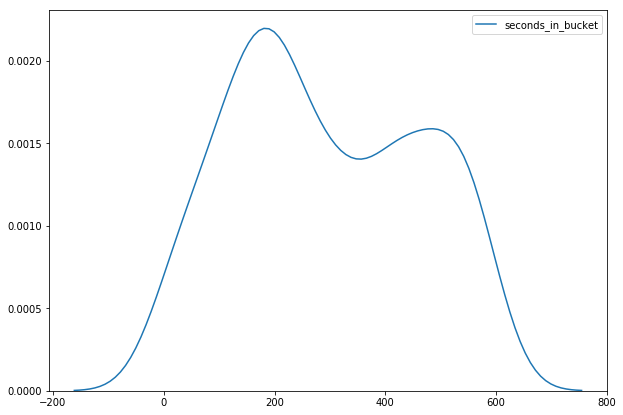

In [92]:
plt.figure(figsize=(10,7))
sns.kdeplot(book_ex.seconds_in_bucket)

In [100]:
up_ratio = up_num/(len(book_ex)-1)

In [102]:
down_ratio = down_num/(len(book_ex)-1)

In [103]:
var_ratio = var_num/(len(book_ex)-1)

In [104]:
realized_vol = realized_volatility(book_ex.log_return)

In [105]:
book_row_num = len(book_ex)-1

In [113]:
right_skew = (book_ex[book_ex.seconds_in_bucket>=300].seconds_in_bucket-300).sum()/len(book_ex[book_ex.seconds_in_bucket>=300])

In [114]:
left_skew = ((-book_ex[book_ex.seconds_in_bucket<300].seconds_in_bucket+300).sum()-300)/(len(book_ex[book_ex.seconds_in_bucket<300])-1)

In [152]:
sizes = list(book_ex.iloc[-1]['bid_size1' : 'ask_size2'])

In [154]:
book_data = pd.DataFrame(np.array([up_ratio, down_ratio, var_ratio, realized_vol, book_row_num, skewness, right_skew, left_skew]+sizes).reshape(1, -1))
book_data.columns = ['up_ratio','down_ratio','var_ratio','realized_vol','book_row_num','skewness','right_skew','left_skew','bid_size1','ask_size1','bid_size2','ask_size2']

In [155]:
book_data

,up_ratio,down_ratio,var_ratio,realized_vol,book_row_num,skewness,right_skew,left_skew,bid_size1,ask_size1,bid_size2,ask_size2
0,0.388704,0.418605,0.807309,0.004499,301.0,-0.853924,152.841727,141.888889,100.0,3.0,26.0,3.0


In [142]:
book_data['down_ratio'] = np.nan

In [143]:
book_data

,up_ratio,down_ratio


In [144]:
book_data.iloc[0, 0] = up_ratio

IndexError: single positional indexer is out-of-bounds